![example](images/director_shot.jpeg)

# Phase 1 Project

**Authors:** Freddy Abrahamson
***

## Overview

The goal of this project is to compare commercial films based on shared traits, such as genre, principal actors/ directors, or release month, in order to determine which types of films are most profitable. The information for this project is derived from several data sets, taken from various reputable movie related websites. I will choose the information I need from these data sets, and import them to pandas. I will clean the data if necessary, and join dataframes to make one large dataframe. I will then use this dataframe to make visualizations
that will help give some insights as to which films are most profitable based on 'return on investment'.

## Business Problem

Microsoft has decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office. I must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

To that end I have chosen three major aspects of the films:

1. Genre
2. Principal actors involved.
3. The month of the year the film was released.

I feel comparing these three  will provide actionable insights, based on return on investment,
as well as shedding some light on where further analysis may be warranted. 


## Data Understanding
***
The data comes from 11 different data sets, from several movie related websites, namely:
* imdb.com  (internet movie database)
* tmdb.com  (the movie database)
* rottentomatoes.com
* boxofficemojo.com
* the-numbers.com

Each dataset has different details about the movies including:
* movie budget
* domestic/worldwide gross
* principal cast and crew
* movie ratings
* release dates
* principal's name
* genre
* runtime

They data I chose came from 4 different tables:
1. tn_movie_budgets_csv_gz: Includes movie names, budgets, domestic/worlwide gross, and release dates.
2. imdb_title_basics_csv_gz: Includes runtime, and genre information.
3. imdb_title_principals_csv_gz: Includes unique codes(nconst) that correspond to the name of each                  respective principal cast and crew member, for each movie.
4. imdb_name_basics_csv_gz: Includes the actual cast and crew names that match up with the (nconst) codes. 

These four tables will be joined, to in turn provide insights into what the respective relationships are
between the genre, principal actors, release month, and their return on investment.

In [1]:
# Import necessary modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os
%matplotlib inline

In [2]:
# Create a variable equivalent to a directory:
fpath = "zippedData/"

# Display files/folders in the directory represented by the variable:
os.listdir(fpath)

['imdb.title.crew.csv.gz',
 '.DS_Store',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'imdb.title.principals.csv',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
# Create a variable that contains any file in the 'fpath' directory that ends in 'gz':
query = fpath+"*.gz"

# Use the variable 'query' along with glob() to return all the files in the 'fpath' directory that end in 'gz':
file_list = glob.glob(query)
file_list 

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
# Creating a dictionary where the keys are the .csv files in 'fpath', and the values are their dataframes:
tables = {}

# The loop formats the name of each file in the'fpath' directory, and converts each to a dataframe:
for file in file_list:
    file_name = file.replace('zippedData/', '').replace('.', '_')
    print("==="*20,"\n\n",)
    print(file_name)
    if ".tsv.gz" in file:
        temp_df = pd.read_csv(file, sep = "\t", encoding ='latin-1')
    else:
        temp_df = pd.read_csv(file)
    display(temp_df.head(), temp_df.tail())
    
# Creates a key:value pair with the 'file_name' and 'temp_df' respectively:    
    tables[file_name] = temp_df



imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242




tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1




imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0




imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128




imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182




rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"




imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary




rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures




tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"




bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018




imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


In [5]:
tables.keys()

dict_keys(['imdb_title_crew_csv_gz', 'tmdb_movies_csv_gz', 'imdb_title_akas_csv_gz', 'imdb_title_ratings_csv_gz', 'imdb_name_basics_csv_gz', 'rt_reviews_tsv_gz', 'imdb_title_basics_csv_gz', 'rt_movie_info_tsv_gz', 'tn_movie_budgets_csv_gz', 'bom_movie_gross_csv_gz', 'imdb_title_principals_csv_gz'])

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [6]:
# I chose to start with this table because it appears to have relevant financial information:
tn_movie_budgets = tables["tn_movie_budgets_csv_gz"].copy()

In [7]:
# Reviewing the general table information, and the column data types:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The dataframe has 6 columns, 5782 rows, and no missing data. I will convert column 1 to a date datatype, and columns 3-5 to float.

In [8]:
# Loop prints out unique data type(s) contained in each column:
for column in tn_movie_budgets.columns:
    print(column,": ",tn_movie_budgets[column].apply(type).unique())

id :  [<class 'int'>]
release_date :  [<class 'str'>]
movie :  [<class 'str'>]
production_budget :  [<class 'str'>]
domestic_gross :  [<class 'str'>]
worldwide_gross :  [<class 'str'>]


In [9]:
# Removing "$" and "," before converting to float: 
cols =["production_budget","domestic_gross","worldwide_gross"]
tn_movie_budgets[cols] = tn_movie_budgets[cols].replace('[$,]','',regex=True)

# Converting columns to float datatype:
for col in cols:
    tn_movie_budgets[col] = tn_movie_budgets[col].astype(float)
    
# Converting 'release_date' column to datetime datatype:    
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])

# Remove any potential whitespace from movie names:   
tn_movie_budgets['movie'] = tn_movie_budgets['movie'].apply(lambda movie:movie.strip())

# Confirming change:
print(tn_movie_budgets.info())
tn_movie_budgets.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 271.2+ KB
None


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


All the columns now have the correct data-types. I will now check for duplicates.

In [10]:
# Reviewing duplicate data information:
all_columns_dupes = tn_movie_budgets.duplicated().sum()
id_dupes = tn_movie_budgets.duplicated(subset=['id']).sum()
movie_dupes = tn_movie_budgets.duplicated(subset=['movie']).sum()

dupes_all_columns = ("There are: {x} duplicate rows in this dataframe.").format(x = all_columns_dupes)
dupes_id_column = ("There are: {y} duplicate values in the id column of this dataframe.").format(y = id_dupes)
dupes_movie_column = ("There are: {z} duplicate values in the movie column of this dataframe.").format(z = movie_dupes)

print(dupes_all_columns)
print(dupes_id_column)
print(dupes_movie_column)


There are: 0 duplicate rows in this dataframe.
There are: 5682 duplicate values in the id column of this dataframe.
There are: 84 duplicate values in the movie column of this dataframe.


In [11]:
# There appear to be only 100 unique values for the id column(rows 0-99).
tn_movie_budgets['id'].nunique()

100

In [12]:
# I will drop this column:
tn_movie_budgets = tn_movie_budgets.drop('id', axis=1)

In [13]:
# Check to see if there are rows with duplicates of both the 'movie' and 'release date' columns:
movie_r_date_dupes = tn_movie_budgets.duplicated(subset=['movie','release_date']).sum()
movie_r_date_dupes

0

Given that there are no duplicates of both the 'movie' and the 'release_date', the  84 rows with the duplicate movie names are most likely different movies. That said, in order to keep all the movie names unique, since these rows make up less than 1.5% of the total set, I will drop these rows.

In [14]:
# Confirming the number of rows is 5698:
tn_movie_budgets = tn_movie_budgets.drop_duplicates(subset=['movie'])
assert len(tn_movie_budgets) == 5698

In [ ]:
#set the movie column as the index
#tn_movie_budgets = tn_movie_budgets.set_index('movie')

This table seems ready to join with other tables. I will repeat this process with the other tables I am looking to join. 

In [16]:
tn_movie_budgets_all_set = tn_movie_budgets.copy()
tn_movie_budgets_all_set.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


I will start with this table because it appears to have relevant runtime, and genre information.

In [17]:
imdb_title_df = tables["imdb_title_basics_csv_gz"].copy()

In [18]:
# Reviewing the general table information, and the column data types:
imdb_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [19]:
# I will first run a check to see if the data types are the same throughout each respective column:
for column in imdb_title_df.columns:
    print(column,": ",imdb_title_df[column].apply(type).unique())

tconst :  [<class 'str'>]
primary_title :  [<class 'str'>]
original_title :  [<class 'str'> <class 'float'>]
start_year :  [<class 'int'>]
runtime_minutes :  [<class 'float'>]
genres :  [<class 'str'> <class 'float'>]


There are two columns with multiple data types. I will convert and then confirm, that not only are the column types, what they should be, but that the data-type of each row matches that of their respective column.

In [20]:
# Convert these columns to str, if they are not so already:
cols =  ['tconst','primary_title','original_title','genres']
for col in cols:
    imdb_title_df[col] = imdb_title_df[col].astype(str)
    
# Confirm that the data types on all columns are uniform:
for column in imdb_title_df.columns:
    print(column,": ",imdb_title_df[column].apply(type).unique())

tconst :  [<class 'str'>]
primary_title :  [<class 'str'>]
original_title :  [<class 'str'>]
start_year :  [<class 'int'>]
runtime_minutes :  [<class 'float'>]
genres :  [<class 'str'>]


All the data types look good. I will not drop any columns for now.

In [21]:
# Removing any potential whitespace from str type columns:
for col in cols:
    imdb_title_df[col] = imdb_title_df[col].apply(lambda m:m.strip())

In [22]:
# Reviewing duplicate data information:
all_columns_dupes = imdb_title_df.duplicated().sum()
tconst_dupes = imdb_title_df.duplicated(subset=['tconst']).sum()
primary_title_dupes = imdb_title_df.duplicated(subset=['primary_title']).sum()

dupes_all_columns = ("There are: {x} duplicate rows in this dataframe.").format(x = all_columns_dupes)
dupes_tconst_column = ("There are: {y} duplicate values in the tconst column of this dataframe.").format(y = tconst_dupes)
dupes_primary_title_column = ("There are: {z} duplicate values in the primary_title column of this dataframe.").format(z = primary_title_dupes)

print(dupes_all_columns)
print(dupes_tconst_column)
print(dupes_primary_title_column)

There are: 0 duplicate rows in this dataframe.
There are: 0 duplicate values in the tconst column of this dataframe.
There are: 10073 duplicate values in the primary_title column of this dataframe.


Given that the 10,073 rows with the duplicate 'primary_title' names make up less than 7% of the original data set, I will drop these, in order to have unique values, and maintain a 1:1 relationship with the imdb_title_df dataframe.  
The dataframe should now have 136,071 rows.

In [23]:
# Dropping duplicates, and confirming new dataframe length:
imdb_title_df = imdb_title_df.drop_duplicates(subset=['primary_title'])
assert len(imdb_title_df) == 136071

This table seems ready to join with other tables. I will repeat this process with the other tables I am looking to join.

In [27]:
# Confirming that there are no duplicates:
imdb_title_df_all_set = imdb_title_df
print('The imdb_title_df_all_set dataframe has',imdb_title_df_all_set.index.duplicated().sum(), 'duplicates.')

The imdb_title_df_all_set dataframe has 0 duplicates.


I will merge tn_movie_budgets_all_set with imdb_title_all_set.

In [48]:
# 'Merging' the two data-sets based on matching columns "movie", and "primary_title":
movie_budget_title_df = tn_movie_budgets_all_set.merge(imdb_title_df_all_set,
                                                       left_on='movie',right_on='primary_title')

In [37]:
# Review new table:
print("There are: ",movie_budget_title_df.duplicated().sum()," duplicate rows in this dataframe.\n")
print(movie_budget_title_df.info())
movie_budget_title_df.head(5)

There are:  0  duplicate rows in this dataframe.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2311
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2312 non-null   datetime64[ns]
 1   movie              2312 non-null   object        
 2   production_budget  2312 non-null   float64       
 3   domestic_gross     2312 non-null   float64       
 4   worldwide_gross    2312 non-null   float64       
 5   tconst             2312 non-null   object        
 6   primary_title      2312 non-null   object        
 7   original_title     2312 non-null   object        
 8   start_year         2312 non-null   int64         
 9   runtime_minutes    2138 non-null   float64       
 10  genres             2312 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 216.8+ KB
None


,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


A few takeaways here:

1. After merging these two dataframes we have a new dataframe with 11 columns, and 2312 rows.  

2. The "runtime_minutes" column has about 200 Nan(s). I will see how to deal with that
   once the dataframe is complete.

3. I will also drop the rows where the "start_year" and the "release_date" don't match, since it appears
   as evidenced by the first row(Avatar) , that these may be referring to different movies. 

I will create two temporary columns corresponding to the 'release_date', and 'start_year' columns. These temporary columns will only the 'year' portion of their respective columns. I will only keep the rows where these temporary columns match. 

In [39]:
# Dropping the rows where the "start_year" and the "release_date" don't match.

# Setting these 2 columns as str type:
movie_budget_title_df.loc[:,'release_date'] = movie_budget_title_df.loc[:,'release_date'].astype(str)
movie_budget_title_df.loc[:,'start_year'] = movie_budget_title_df.loc[:,'start_year'].astype(str)

# Creating two temporary columns with the string slices I want to compare (only the year portion of the date):
movie_budget_title_df.loc[:,'release_year'] = movie_budget_title_df.loc[:,'release_date'].str.slice(0, 4)
movie_budget_title_df.loc[:,'year_only'] = movie_budget_title_df.loc[:,'start_year'].str.slice(0, 4)

# I will keep only the rows where these columns match:
movie_budget_title_df = movie_budget_title_df.loc[movie_budget_title_df.loc[:,'release_year'] == 
                                                  movie_budget_title_df.loc[:,'year_only'] ]

# Setting these 2 columns back to their original data types:
movie_budget_title_df.loc[:,'release_date'] = pd.to_datetime(movie_budget_title_df.loc[:,'release_date'])
movie_budget_title_df.loc[:,'start_year'] = movie_budget_title_df.loc[:,'start_year'].astype(float)

# Dropping the 2 temporary 'slice' columns:
movie_budget_title_df.drop(['release_year', 'year_only'], axis=1, inplace = True)

# Reviewing final dataframe:
print(movie_budget_title_df.info(),'\n')
movie_budget_title_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1349 entries, 1 to 2305
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       1349 non-null   datetime64[ns]
 1   movie              1349 non-null   object        
 2   production_budget  1349 non-null   float64       
 3   domestic_gross     1349 non-null   float64       
 4   worldwide_gross    1349 non-null   float64       
 5   tconst             1349 non-null   object        
 6   primary_title      1349 non-null   object        
 7   original_title     1349 non-null   object        
 8   start_year         1349 non-null   float64       
 9   runtime_minutes    1341 non-null   float64       
 10  genres             1349 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 126.5+ KB
None 



,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
5,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"


In [40]:
# Checking for duplicate release dates:
movie_budget_title_df.duplicated(['release_date']).sum()

758

I saw that there are 758 movies with duplicate release dates. I checked a few movies, and it turns out several movies are in fact released on the same dates. 

In [41]:
# Check to see what movie years are covered:
movie_budget_title_df.start_year.unique()

array([2011., 2019., 2015., 2018., 2017., 2012., 2013., 2010., 2016.,
       2014., 2020.])

I now have 1349 movies with release years for 2010-2020. This dataframe looks ready to be joined with another.

In [42]:
movie_budget_title_df_all_set = movie_budget_title_df

I chose this dataset because it has information on the principal cast and crew of the movie(s)

In [43]:
# Partial dataframe view:
principals_df = tables["imdb_title_principals_csv_gz"].copy()
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [44]:
# Reviewing the general table information, and the column data types:
principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   tconst      1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   nconst      1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


This dataframe has 6 columns, and 1028186 rows. Most of the rows in the 'job', and 'caracters' columns are missing data. 

In [45]:
# I will drop the 'job' and 'character'columns, since the vast majority of their values are NaN(s).
# I will also drop the 'ordering' column since it does not contain relevant indformation:

principals_df.drop(['job', 'characters','ordering'], axis=1, inplace=True)

# Confirming:
principals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   tconst    1028186 non-null  object
 1   nconst    1028186 non-null  object
 2   category  1028186 non-null  object
dtypes: object(3)
memory usage: 23.5+ MB


In [46]:
# Checking if all the data types are uniform for each column:

for column in principals_df.columns:
    print(column,": ",principals_df[column].apply(type).unique())

tconst :  [<class 'str'>]
nconst :  [<class 'str'>]
category :  [<class 'str'>]


I would expect duplicates here since each movie can have multiple principals, and each principal can be in multiple movies this dataframe is ready to join.

In [47]:
# Reviewing dataframe:
principals_df_all_set = principals_df
movie_budget_title_df_all_set.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy"
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi"
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi"
4,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018.0,149.0,"Action,Adventure,Sci-Fi"
5,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,tt0974015,Justice League,Justice League,2017.0,120.0,"Action,Adventure,Fantasy"


Merging the two dataframes: 'movie_budget_title_df_all_set', and 'principals_df_all_set'.

In [49]:
#inner merge based on 'tconst':
movie_budget_title_principals_df = movie_budget_title_df_all_set.merge(principals_df_all_set, left_on='tconst',right_on='tconst')

#review new dataframe
movie_budget_title_principals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13394 entries, 0 to 13393
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       13394 non-null  datetime64[ns]
 1   movie              13394 non-null  object        
 2   production_budget  13394 non-null  float64       
 3   domestic_gross     13394 non-null  float64       
 4   worldwide_gross    13394 non-null  float64       
 5   tconst             13394 non-null  object        
 6   primary_title      13394 non-null  object        
 7   original_title     13394 non-null  object        
 8   start_year         13394 non-null  float64       
 9   runtime_minutes    13321 non-null  float64       
 10  genres             13394 non-null  object        
 11  nconst             13394 non-null  object        
 12  category           13394 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(7)
memory usage: 1.4

The resulting dataframe has 13 columns, 13394 rows, and no missing data.

In [50]:
movie_budget_title_principals_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,nconst,category
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",nm0694627,writer
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",nm0000136,actor
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",nm0004851,actress
3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",nm0574534,actor
4,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",nm0001691,actor


#The dataframe is now about ten times larger, than the 'movie_budget_title_df' since it accounts for the multiple 'principals' in each movie. This dataframe is now ready to be merged.


In [51]:
movie_budget_title_principals_df_all_set = movie_budget_title_principals_df

In order to get the actual names of the principals, we need to join one more dataframe.

In [52]:
# Reviewing dataframe with the 'principals' names:
names_df = tables["imdb_name_basics_csv_gz"].copy()
names_df.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [53]:
# I will drop all the columns except the 'nconst' and 'primary_names':
names_df.drop(['birth_year', 'death_year','primary_profession','known_for_titles'], axis=1, inplace = True)

# Confirm:
names_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   nconst        606648 non-null  object
 1   primary_name  606648 non-null  object
dtypes: object(2)
memory usage: 9.3+ MB


In [54]:
# Quick check to confirm 'nconst' has no duplicates:
names_df.duplicated().sum()

0

In [55]:
# Checking if all the data types are uniform for each column:
for column in names_df.columns:
    print(column,": ",names_df[column].apply(type).unique())

nconst :  [<class 'str'>]
primary_name :  [<class 'str'>]


In [56]:
# Removing any potential whitespace from str type columns:
cols = ['primary_name','nconst']
for col in cols:
    names_df[col] = names_df[col].apply(lambda m:m.strip())

This dataset is ready to be merged. Merging the two dataframes: 'names_df_all_set', and 'movie_budget_title_principals_df_all_set' to create 'all_movie_df'.

In [57]:
# This dataframe is all set and ready to merge:
names_df_all_set = names_df

# Merging with larger dataframe:
all_movie_df = movie_budget_title_principals_df_all_set.merge(names_df_all_set, left_on='nconst',right_on='nconst')

# Review:
print(all_movie_df.info())
all_movie_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13393 entries, 0 to 13392
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       13393 non-null  datetime64[ns]
 1   movie              13393 non-null  object        
 2   production_budget  13393 non-null  float64       
 3   domestic_gross     13393 non-null  float64       
 4   worldwide_gross    13393 non-null  float64       
 5   tconst             13393 non-null  object        
 6   primary_title      13393 non-null  object        
 7   original_title     13393 non-null  object        
 8   start_year         13393 non-null  float64       
 9   runtime_minutes    13320 non-null  float64       
 10  genres             13393 non-null  object        
 11  nconst             13393 non-null  object        
 12  category           13393 non-null  object        
 13  primary_name       13393 non-null  object        
dtypes: dat

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,nconst,category,primary_name
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",nm0694627,writer,Tim Powers
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",nm0000136,actor,Johnny Depp
2,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,tt1210819,The Lone Ranger,The Lone Ranger,2013.0,150.0,"Action,Adventure,Western",nm0000136,actor,Johnny Depp
3,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,230000000.0,172558876.0,7.882411e+08,tt1790809,Pirates of the Caribbean: Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,129.0,"Action,Adventure,Fantasy",nm0000136,actor,Johnny Depp
4,2010-03-05,Alice in Wonderland,200000000.0,334191110.0,1.025491e+09,tt1014759,Alice in Wonderland,Alice in Wonderland,2010.0,108.0,"Adventure,Family,Fantasy",nm0000136,actor,Johnny Depp


'all_movie_df' has 14 columns, 13393 rows, and only the 'runtime_minutes' column has missing data.

Creating a new dataframe 'movie_stats_df' with some columns that will not be used dropped.

In [58]:
# I will drop a few columns I don't plan to use ('nconst', 'tconst', 'original_title'):
movie_stats_df = all_movie_df.drop(columns=['nconst', 'tconst', 'original_title'])

# Confirm:
movie_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13393 entries, 0 to 13392
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       13393 non-null  datetime64[ns]
 1   movie              13393 non-null  object        
 2   production_budget  13393 non-null  float64       
 3   domestic_gross     13393 non-null  float64       
 4   worldwide_gross    13393 non-null  float64       
 5   primary_title      13393 non-null  object        
 6   start_year         13393 non-null  float64       
 7   runtime_minutes    13320 non-null  float64       
 8   genres             13393 non-null  object        
 9   category           13393 non-null  object        
 10  primary_name       13393 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.2+ MB


'movie_stats_df' now has 11 rows, and 13393 rows.

I will set the 'genres' column, so that there is only one genre per row. This will help in the analysis.

In [59]:
# I will use .split() to split these, creating a list based on the delimiter ',':
movie_stats_df['genres'] = movie_stats_df['genres'].str.split(',')

#confirm:
movie_stats_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,start_year,runtime_minutes,genres,category,primary_name
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",writer,Tim Powers
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",actor,Johnny Depp
2,2013-07-02,The Lone Ranger,275000000.0,89302115.0,2.600021e+08,The Lone Ranger,2013.0,150.0,"[Action, Adventure, Western]",actor,Johnny Depp
3,2017-05-26,Pirates of the Caribbean: Dead Men Tell No Tales,230000000.0,172558876.0,7.882411e+08,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,129.0,"[Action, Adventure, Fantasy]",actor,Johnny Depp
4,2010-03-05,Alice in Wonderland,200000000.0,334191110.0,1.025491e+09,Alice in Wonderland,2010.0,108.0,"[Adventure, Family, Fantasy]",actor,Johnny Depp


In [61]:
movie_stats_df['genres'][11]

['Action', 'Comedy', 'Crime']

I will create a nested loop, where all the rows of the original dataframe ('movie_stats_df'), will
be appended to a new dataframe ('movie_all_stats_df'), but each row will now correspond to only one genre. For example, row 0, in 'movie_stats_df', has 3 genres. In the new dataframe this will be converted into 3 rows, with each row having only one genre. This will be done in two steps:

1. Create the new dataframe with all the new rows, as if the genres were split, but this dataframe will still contain list of genres for the rows where a movie belongs to more than one genre.

2. I will take the genre column from the 'all_movie_df' dataframe and create a list of lists. I will then flatten this list, and make the genre column in the new dataframe 'movie_all_stats_df' equal to this list.

In [87]:
# Creating new dataframe where the genres are separated:
movie_all_stats_df = pd.DataFrame()

# Creating a list of the column names:
columns = list(movie_stats_df)

# Creating a list. It will be used as a list of dictionaries. It will act as a 'go-between' for the two dataframes:
data = []

# 'i' iterates through each row of the dataframe 'movie_stats_df':
for i in range(0,len(movie_stats_df)):
    
    # 'k' iterates through the list of genres in the ith row of 'movie_stats_df' :    
    k = (len(movie_stats_df['genres'][i]))
    
    # The loop will create a dictionary with the values in the ith row, and append it to the 'data' list, k times:    
    while(k>0):
        values = movie_stats_df.iloc[i,:]
        zipped = zip(columns, values)
        a_dictionary = dict(zipped)
        #print(a_dictionary)
        data.append(a_dictionary)
        k-=1

# The whole list of dictionaries is appended to the dataframe:
movie_all_stats_df = movie_all_stats_df.append(data)

# Reviewing resulting dataframe:
print(movie_all_stats_df.info())
movie_all_stats_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34437 entries, 0 to 34436
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       34437 non-null  datetime64[ns]
 1   movie              34437 non-null  object        
 2   production_budget  34437 non-null  float64       
 3   domestic_gross     34437 non-null  float64       
 4   worldwide_gross    34437 non-null  float64       
 5   primary_title      34437 non-null  object        
 6   start_year         34437 non-null  float64       
 7   runtime_minutes    34294 non-null  float64       
 8   genres             34437 non-null  object        
 9   category           34437 non-null  object        
 10  primary_name       34437 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 2.9+ MB
None


,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,start_year,runtime_minutes,genres,category,primary_name
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",writer,Tim Powers
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",writer,Tim Powers
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",writer,Tim Powers
3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",actor,Johnny Depp
4,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]",actor,Johnny Depp


Currently the dataframe has all the rows it would have if the genres were separated, but the rows still have lists of genres.

In [88]:
# Take the column from all_movie_df and create a list, of lists called 'genre_list', using .split()
genre_list = all_movie_df['genres'].tolist()
for  i in range(0, len(genre_list)):
        genre_list[i] = genre_list[i].split(',')

# The loop creates a new 'flat' list, that appends each genre in each row of the 'genre_list', as a separate element:
non_unique_genre_list = []       
for  i in range(0, len(genre_list)):
    for genre in range(0, len(genre_list[i])):
         non_unique_genre_list.append(genre_list[i][genre])

# Confirm:
len(non_unique_genre_list)  

34437

As expected, the length ot the list with all the genres separated, is the same as that of the new dataframe movie_all_stats_df. I will noe replace the current values in the movie_all_stats_df['genres'] column, with that of the non_unique_genre_list. 

In [89]:
movie_all_stats_df['genres'] = non_unique_genre_list
print(movie_all_stats_df.info())
movie_all_stats_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34437 entries, 0 to 34436
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       34437 non-null  datetime64[ns]
 1   movie              34437 non-null  object        
 2   production_budget  34437 non-null  float64       
 3   domestic_gross     34437 non-null  float64       
 4   worldwide_gross    34437 non-null  float64       
 5   primary_title      34437 non-null  object        
 6   start_year         34437 non-null  float64       
 7   runtime_minutes    34294 non-null  float64       
 8   genres             34437 non-null  object        
 9   category           34437 non-null  object        
 10  primary_name       34437 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 2.9+ MB
None


,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,start_year,runtime_minutes,genres,category,primary_name
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action,writer,Tim Powers
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Adventure,writer,Tim Powers
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Fantasy,writer,Tim Powers
3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action,actor,Johnny Depp
4,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Adventure,actor,Johnny Depp


We now have a resulting dataframe with 34437 rows, and all the genres separated. I will now add a column named 'roi' which subtracts the "production_budget"  from the sum of the 'domestic_gross' and the 'worldwide_gross'.

In [91]:
# Creating 'roi' column:
roi_column = movie_all_stats_df['domestic_gross'] + movie_all_stats_df['worldwide_gross'] - movie_all_stats_df['production_budget'] 
movie_all_stats_df['roi'] = roi_column
movie_all_stats_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,primary_title,start_year,runtime_minutes,genres,category,primary_name,roi
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action,writer,Tim Powers,876127750.0
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Adventure,writer,Tim Powers,876127750.0
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Fantasy,writer,Tim Powers,876127750.0
3,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Action,actor,Johnny Depp,876127750.0
4,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,Adventure,actor,Johnny Depp,876127750.0


I will replace the Nan(s) in the 'runtime_minutes' column with their median value.

In [92]:
# Inputing median value to missing rows:
runtime_med = movie_all_stats_df['runtime_minutes'].median()
movie_all_stats_df.fillna(runtime_med, inplace=True)

# Confirm:
movie_all_stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34437 entries, 0 to 34436
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       34437 non-null  datetime64[ns]
 1   movie              34437 non-null  object        
 2   production_budget  34437 non-null  float64       
 3   domestic_gross     34437 non-null  float64       
 4   worldwide_gross    34437 non-null  float64       
 5   primary_title      34437 non-null  object        
 6   start_year         34437 non-null  float64       
 7   runtime_minutes    34437 non-null  float64       
 8   genres             34437 non-null  object        
 9   category           34437 non-null  object        
 10  primary_name       34437 non-null  object        
 11  roi                34437 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 3.2+ MB


The movie_all_stats_df is all set. This is the dataframe I will use to make sub-Dataframes for visualizations. 

In [103]:
# Checking to see the number of unique movies:
all_movie_df['movie'].nunique()

1349

In [104]:
# Creating this dataframe to run a preliminary check to see if I have enough actor data,
# relative to the 1349 unique movie titles.

# Creating sub-dataframe:
only_movie_df = movie_all_stats_df[["category",'movie','roi','primary_name']]

# Dropping duplicates that may have been created where a particular movie belongs to multiple genres:
only_movie_df = only_movie_df.drop_duplicates()

In [113]:
# Creating a dataframe with only the principal actors as categories:
only_actors_df = only_movie_df.loc[(only_movie_df ["category"] == "actor") | 
                                   (only_movie_df ["category"] == "actress") ]
print('The only_actors_df has', len(only_actors_df), 'rows.')
print('The only_actors_df has', only_actors_df.duplicated().sum(),'duplicate rows')
print('The only_actors_df has', only_actors_df.movie.nunique(), 'unique movies.')
print('The only_actors_df has', only_actors_df.primary_name.nunique(), 'unique actors.')

The only_actors_df has 5311 rows.
The only_actors_df has 0 duplicate rows
The only_actors_df has 1334 unique movies.
The only_actors_df has 2704 unique actors.


A few takeaways:
1. There are no duplicate rows
2. There are more unique actors than movies.
3. One movie can have more than one primary actor, and each actor for that movie would be in a differnt row.
4. With 1334 of the total 1349 movies I have enough data to make an analysis on the following:

                                                                    1. genre
                                                                    2. actors/actresses
                                                                    3. month of the year

In [116]:
# Displaying the dataframe info():
only_actors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5311 entries, 3 to 34431
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      5311 non-null   object 
 1   movie         5311 non-null   object 
 2   roi           5311 non-null   float64
 3   primary_name  5311 non-null   object 
dtypes: float64(1), object(3)
memory usage: 207.5+ KB


In [115]:
# Displaying the complete dataframe:
pd.set_option('display.max_rows', None)
only_actors_df.sort_values(by=['movie'])

,category,movie,roi,primary_name
32583,actress,#Horror,-1.500000e+06,Blue Lindeberg
32580,actress,#Horror,-1.500000e+06,Bridget McGarry
32577,actress,#Horror,-1.500000e+06,Haley Murphy
32574,actress,#Horror,-1.500000e+06,Sadie Seelert
3223,actor,10 Cloverfield Lane,1.753694e+08,John Goodman
12327,actress,10 Cloverfield Lane,1.753694e+08,Mary Elizabeth Winstead
22971,actor,10 Cloverfield Lane,1.753694e+08,John Gallagher Jr.
7204,actor,10 Cloverfield Lane,1.753694e+08,Douglas M. Griffin
27452,actress,10 Days in a Madhouse,-1.197077e+07,Julia Chantrey
27451,actress,10 Days in a Madhouse,-1.197077e+07,Kelly LeBrock


# Data Analysis

## Which genres are the most successful ?

In [117]:
# Creating a sub-dataframe for to analyze genre(s):
genre_roi_df =  movie_all_stats_df[['movie',"genres", "roi",]]

# Dropping duplicate values:
genre_roi_df_sorted = genre_roi_df.drop_duplicates().sort_values(by=(['movie']))

# Dataframe info():
genre_roi_df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3462 entries, 32140 to 1515
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   movie   3462 non-null   object 
 1   genres  3462 non-null   object 
 2   roi     3462 non-null   float64
dtypes: float64(1), object(2)
memory usage: 108.2+ KB


### Methodology used for genres data:

1. I will give each genre a weighted value relative to its roi. For example if a movie has 3 genres and an roi of        900,000 dollars, I will attribute an roi of 300,000 dollars to each genre.
2. To that end ,  I will create a list of unique movies sorted in ascending order, and a list with the number of          genres associated with each movie.
3. I will then create a dictionary with the list of movies as its keys, and the list of genre counts as its values.
4. For each row on the dataframe, I will use this dictionary to map the value(s) that correspond to a movie(key), to      a new column called 'genre_roi_div'.   
5. For each row on the dataframe, I will then divide the value in the 'roi' column, by the value in the                  'genre_roi_div' column and store the quotient in a new column called 'genre_roi'.
   

In [123]:
# Creating a list of unique movies sorted in ascending order:
movie_names_sorted = sorted([movie for movie in genre_roi_df_sorted['movie'].unique()])

# Grouping dataframe by 'movie', and displaying the total number of genres associated with each movie:
movie_counts = genre_roi_df_sorted.groupby('movie').genres.count()

# Creating a list of the genre count for each movie:
movie_count_list = list(movie_counts)

# Creating a dictionary that will have the movie names as its keys, and the genre count for each movie as its values:
movie_counts_dict = {k:v  for k, v in zip(movie_names_sorted, movie_count_list)}

# Using the dictionary to map values from the the 'movie' column, to the newly created 'genre_roi_div' column:
genre_roi_df_sorted['genre_roi_div'] = genre_roi_df_sorted['movie'].map(movie_counts_dict)

# Creating a 'genre_roi' column, which is equal to 'roi' column divided by the 'genre_roi_div' column:
genre_roi_df_sorted['genre_roi'] = genre_roi_df_sorted['roi'] / genre_roi_df_sorted['genre_roi_div']

# Display dataframe:
genre_roi_df_sorted.head()

,movie,genres,roi,genre_roi_div,genre_roi
32140,#Horror,Crime,-1500000.0,3,-5.000000e+05
32142,#Horror,Horror,-1500000.0,3,-5.000000e+05
32141,#Horror,Drama,-1500000.0,3,-5.000000e+05
3223,10 Cloverfield Lane,Drama,175369421.0,3,5.845647e+07
3224,10 Cloverfield Lane,Horror,175369421.0,3,5.845647e+07


I will now create a sub-dataframe that is made up of only the 'genre' and 'genre_roi' columns. It will be sorted from greatest to least, based on the average return on investment of each genre. 

In [124]:
# Creating a dataframe that is grouped by common genres, and displays the mean roi for each genre:
genre_gpby_roi_df = genre_roi_df_sorted.groupby('genres').genre_roi.mean()

# Converting the genre_roi to int type, converting the series into a dataframe, and resetting the index:
genre_gpby_roi_df = (genre_gpby_roi_df).astype(int).to_frame().reset_index()

# Sorting by the 'genre_roi' column, from greatest to least:
genre_gpby_roi_df = genre_gpby_roi_df.sort_values(by=['genre_roi'],ascending=False)

# Displaying dataframe:
genre_gpby_roi_df

,genres,genre_roi
16,Sci-Fi,132294796
2,Animation,130893065
1,Adventure,124488657
0,Action,88649274
9,Fantasy,79943386
8,Family,64035931
4,Comedy,60016751
18,Thriller,48625919
20,Western,42617237
12,Music,36978709


I will create a barplot, that will serve as a visual representation of the return on investment per genre.

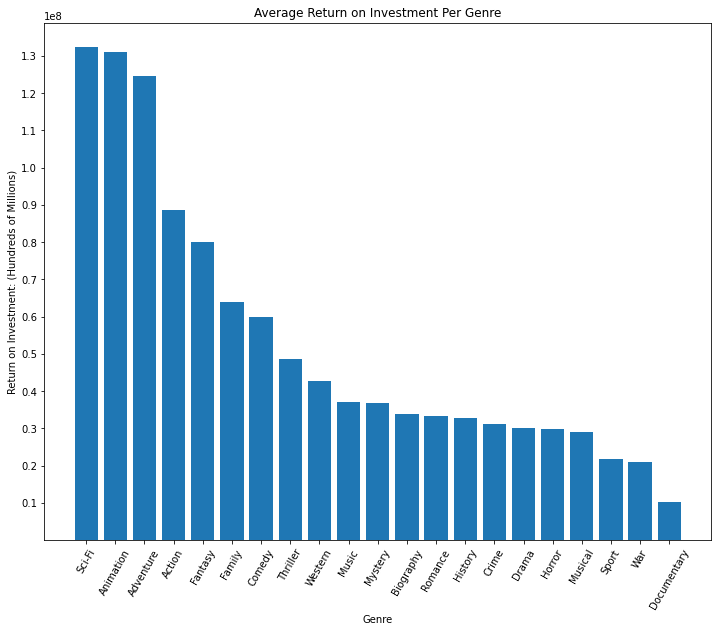

In [131]:
# Creating matplotlib figure and axes, and specifying the figure size:
fig, ax = plt.subplots(figsize=(10, 8))

# The x-axis represents the 'genres' and the y-axis represents the 'genre_roi':
x = genre_gpby_roi_df['genres']
y = genre_gpby_roi_df['genre_roi']

# Creates evenly spaced values between 10 million and 140 million that will be used as ticks for the y-axis:
yticks = np.linspace(start=10000000, stop=140000000, num=14)

# Setting the 'yticks'
ax.set_yticks(yticks)

# rotating 'xticks' do degrees clockwise:
plt.xticks(rotation=60)

# Allows for automatic or manual setting of the spacing(s) between different elements in the plot:
plt.tight_layout()

# Creating the barplot:
ax.bar(x, y)

# Setting the title:
ax.set_title("Average Return on Investment Per Genre")

# Setting the label for the x-axis:
ax.set_xlabel("Genre")

# Setting the label for the y-axis:
ax.set_ylabel("Return on Investment: (Hundreds of Millions)");

* Of the 21 total genres, the genres with the highest average yield by far are Sci-fi, Animation,and Adventure. These   have an average return on investment of between 124 million dollars, and 132 million dollars.
* Following these, there is a precipitous drop in the average roi, with a range of between 60 million dollars, and 88   million dollars. The genres in this range are Action, Fantasy, Family,and Comedy.
* These 7 genres represent the top third (33.33%) of all the genres. 
* The remaining genres have an average yield of under 50 million dollars.

## Movies with which actors are the most successful ?

Reviewing some information about the 'only_actors_df' dataframe before I continue:

In [135]:
# Review only_actors_df:
print(only_actors_df.info())
print("There are ",only_actors_df.duplicated().sum()," duplicates")
only_actors_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5311 entries, 3 to 34431
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   category      5311 non-null   object 
 1   movie         5311 non-null   object 
 2   roi           5311 non-null   float64
 3   primary_name  5311 non-null   object 
dtypes: float64(1), object(3)
memory usage: 207.5+ KB
None
There are  0  duplicates


,category,movie,roi,primary_name
3,actor,Pirates of the Caribbean: On Stranger Tides,8.761278e+08,Johnny Depp
6,actor,The Lone Ranger,7.430423e+07,Johnny Depp
9,actor,Pirates of the Caribbean: Dead Men Tell No Tales,7.308000e+08,Johnny Depp
12,actor,Alice in Wonderland,1.159682e+09,Johnny Depp
15,actor,Fantastic Beasts: The Crimes of Grindelwald,6.117760e+08,Johnny Depp


In [133]:
print("There are ",only_actors_df.primary_name.nunique()," different actors")

There are  2704  different actors


In [137]:
# Creating a dataframe which displays how many movies has an actor appeared in:
actor_val_count_df = only_actors_df.primary_name.value_counts(ascending=True).to_frame()

# This will display only the actors who have appeared in only one movie: 
actor_val_count_1 = actor_val_count_df.loc[actor_val_count_df['primary_name'] == 1]

print("There are ",only_actors_df.primary_name.nunique()," different actors")
print("There are ", len(actor_val_count_1)," actors who appeared in only 1 movie")

There are  2704  different actors
There are  1807  actors who appeared in only 1 movie


### Methodology used for actors data:

1. There are 2703 unique actors, and of those 1807 apeared in only 1 movie. I think that, to avoid anomalies where an    actor that appeared only in 1 movie, which may be a top grossing movie, shows up as a top earner by virtue of that    single movie, I will use the sum as the metric instead of the mean. The actors which consistently generated a lot      of revenue will still top the list, and then there may be actors who are consistent earners, whose movies may have    cumulatively earned a good amount of revenue, instead of simply taking part in a single blockbuster. 
2. As was the case with genres, I will give each actor a weighted value relative to their roi. For example if a movie    has 3 actors, and an roi of 900,000 dollars, I will attribute an roi of 300,000 dollars to each actor.
3. To that end ,  I will create a list of unique movies sorted in ascending order, and another list with the number of    actors associated with each movie.
4. I will then create a dictionary with the list of movies as its keys, and the list of actor counts as its values.
5. For each row on the dataframe, I will use this dictionary to map the value(s) that correspond to a movie(key), to      a new column called 'actor_roi_div'.   
6. For each row on the dataframe, I will then divide the value in the 'roi' column, by the value in the                  'actor_roi_div' column and store the quotient in a new column called 'actor_roi'.

In [138]:
# Sorting the dataframe by the 'movie' column in ascending order:
actor_roi_df_sorted = only_actors_df.sort_values(by=(['movie']))

In [139]:
# Creating a list of unique movies sorted in ascending order:
movie_names_sorted = sorted([movie for movie in actor_roi_df_sorted['movie'].unique()])

# Grouping dataframe by 'movie', and displaying the total number of actors associated with each movie:
actor_counts = actor_roi_df_sorted.groupby('movie').category.count()

# Creating a list of the actor count for each movie:
actor_count_list = list(actor_counts)

# Creating a dictionary that will have the movie names as its keys, and the actor count for each movie as its values:
actor_counts_dict = {k:v  for k, v in zip(movie_names_sorted, actor_count_list)}

# Using the dictionary to map values from the the 'movie' column, to the newly created 'actor_roi_div' column:
actor_roi_df_sorted['actor_roi_div'] = actor_roi_df_sorted['movie'].map(actor_counts_dict)

# Creating a 'actor_roi' column, which is equal to 'roi' column divided by the 'actor_roi_div' column:
actor_roi_df_sorted['actor_roi'] = actor_roi_df_sorted['roi'] / actor_roi_df_sorted['actor_roi_div']

# Display dataframe:
actor_roi_df_sorted.head()

,category,movie,roi,primary_name,actor_roi_div,actor_roi
32583,actress,#Horror,-1500000.0,Blue Lindeberg,4,-375000.00
32580,actress,#Horror,-1500000.0,Bridget McGarry,4,-375000.00
32577,actress,#Horror,-1500000.0,Haley Murphy,4,-375000.00
32574,actress,#Horror,-1500000.0,Sadie Seelert,4,-375000.00
3223,actor,10 Cloverfield Lane,175369421.0,John Goodman,4,43842355.25


In [140]:
# Creating a dataframe that is grouped by common actors, and displays the sum of the roi(s) for each actor:
actor_gpby_roi_df = actor_roi_df_sorted.groupby('primary_name').actor_roi.sum()

# Converting the actor_roi to int type, converting the series into a dataframe, and resetting the index:
actor_gpby_roi_df = (actor_gpby_roi_df).astype(int).to_frame().reset_index()

# Sorting by the 'actor_roi' column, from greatest to least:
actor_gpby_roi_df = actor_gpby_roi_df.sort_values(by=['actor_roi'],ascending=False)

# Creating a dataframe that displays only the top 50 actors based on their cumulative return on investment:
actor_roi_top_50 = actor_gpby_roi_df.iloc[0:50, 0:]

# Displaying dataframe:
actor_roi_top_50.head()

,primary_name,actor_roi
2182,Robert Downey Jr.,2829527299
722,Dwayne Johnson,2129361539
451,Chris Evans,2109185497
452,Chris Hemsworth,1643390190
1714,Mark Ruffalo,1533419456


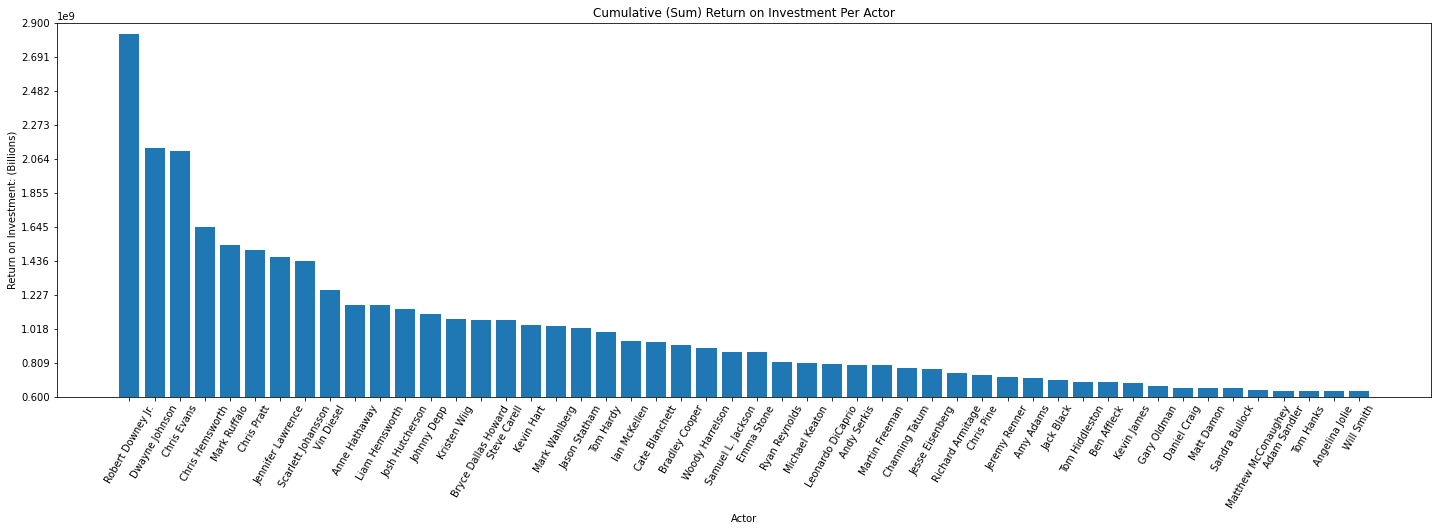

In [143]:
# Creating matplotlib figure and axes, and specifying the figure size:
fig, ax = plt.subplots(figsize=(20, 6))

# The x-axis represents the 'primary_name' and the y-axis represents the 'actor_roi':
x = actor_roi_top_50['primary_name']
y = actor_roi_top_50['actor_roi']

# Creates evenly spaced values between 600 million and 2.9 billion that will be used as ticks for the y-axis:
yticks = np.linspace(start=600000000, stop=2900000000, num=12)

# Setting the 'yticks':
ax.set_yticks(yticks);

# rotating 'xticks' do degrees clockwise:
plt.xticks(rotation=60)

# Allows for automatic or manual setting of the spacing(s) between different elements in the plot:
plt.tight_layout()

# Creating the barplot:
ax.bar(x, y)

# Setting the title:
ax.set_title("Cumulative (Sum) Return on Investment Per Actor")

# Setting the label for the x-axis:
ax.set_xlabel("Actor")

# Setting the label for the y-axis:
ax.set_ylabel("Return on Investment: (Billions)")

# Specifying the upper and lower limits to be displayed on the yticks:
ax.set_ylim(600000000,2900000000);

* Of the total 2703 actors, this chart represents the top 50 actors based on their cumulative return 
  on investment. 
* This in turn represents slightly under 2% of the total actors listed.
* Robert Downey Jr. stands alone by far, with a cumulative return on investment of over 2.8 billion dollars.
* His cumulative roi is about one third greater (33.3%) than the following two actors Dwayne Johnson and Chris Evans,   who both have a cumulative roi of about 2.1 billion.
* These three round out the actors with a cumulative roi of 2 billion and above.
* Immediately following them, there are five actors: Chris Hemsworth, Mark Ruffalo, Chris Pratt, and Jennifer           Lawrence, who have a cumulative roi of between 1.4 and 1.6 billion.
* The remaining actors represented here have a cumulative roi of 1.25 billion or less, with about 75% of those being     under 1 billion dollars.

## Corelation between release date and the return on investment ?

In [147]:
# Creating a dataframe with only the 'movie',"release_date", and "roi" columns, and dropping the duplicates:
release_date_df = movie_all_stats_df[['movie',"release_date", "roi",]].drop_duplicates()

# Creating a pandas series that displays the mean return on investment based on the month the movie was released:
release_date_df = release_date_df.groupby(release_date_df.release_date.dt.month).roi.mean()

# Converting the series to a dataframe and resetting the index:
release_date_df = release_date_df.to_frame().reset_index()

# Creating a dictionary with the number of the month, and its corresponding name:
months_dict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun', 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

# Using the dictionary to map the number of the month in the 'release_date' column, to the 'month_name' column:
release_date_df['month_name'] = release_date_df['release_date'].map(months_dict)

# Displaying dataframe
release_date_df

,release_date,roi,month_name
0,1,8.693033e+07,Jan
1,2,1.692463e+08,Feb
2,3,1.571784e+08,Mar
3,4,1.791278e+08,Apr
4,5,2.739686e+08,May
5,6,2.720699e+08,Jun
6,7,2.112183e+08,Jul
7,8,1.067273e+08,Aug
8,9,7.269437e+07,Sep
9,10,7.803571e+07,Oct


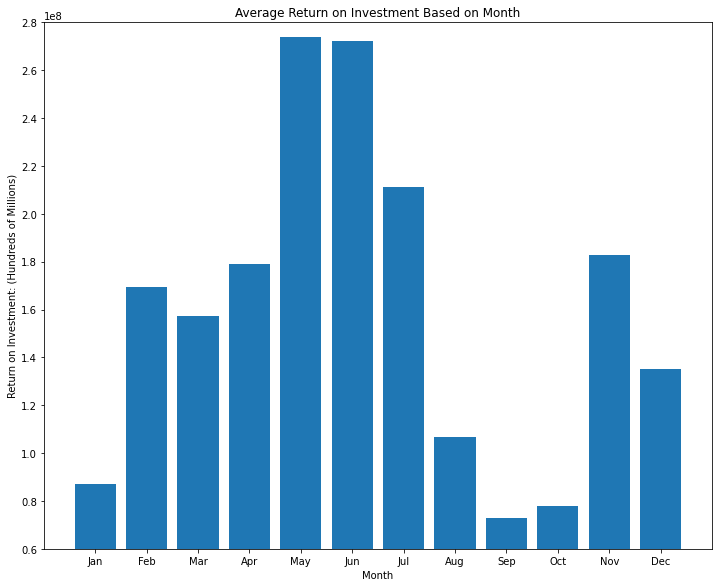

In [149]:
# Creating matplotlib figure and axes, and specifying the figure size:
fig, ax = plt.subplots(figsize=(10, 8))

# The x-axis represents the 'month_name' and the y-axis represents the 'roi':
x = release_date_df['month_name']
y = release_date_df['roi']

# Creates evenly spaced values between 60 million and 280 million that will be used as ticks for the y-axis:
yticks = np.linspace(start=60000000, stop=280000000, num=12)

# Setting the 'yticks':
ax.set_yticks(yticks)

# Allows for automatic or manual setting of the spacing(s) between different elements in the plot:
plt.tight_layout()

# Creating the barplot:
ax.bar(x, y)

# Setting the title:
ax.set_title("Average Return on Investment Based on Month")

# Setting the x_label:
ax.set_xlabel("Month")

# Setting the y_label:
ax.set_ylabel("Return on Investment: (Hundreds of Millions)")

# Specifying the upper and lower limits to be displayed on the yticks:
ax.set_ylim(60000000,280000000);

* May and June both yield an average return on investment of 270 million dollars, which are by far the highest           returns. 
* These are followed by July with an average roi of 210 million.
* These round out the top 3, and the only months with average roi(s) greater than or equal to, 200 million dollars.
* September is the month with the lowest average roi, at 72 million.
* It is followed by October and January with average roi(s) of 78 million, and 86 million dollars respectively.
* The rest of the months have an average roi between 130 and 180 milliondollars, with th exception of August, which is   considerably lower at about 100 million. 



## Conclusions
Based on this analysis, the recommendations to Microsoft for creating a profitable movie are:

* **Given that these movie genres yield the highest average return on investment by far, I highly recommend 
  considering making Sci-fi, Animation and Adventure movies.** Beyond that, at a distant second, but still         offering  a very high return on investment when compared to the rest of the genres, Action, and Fantasy films     are also good options.
  
  
* **When it comes to return on investment, I would most highly recommend the top nineteen actors in this chart      who constitute the very best, of the very best.** Beginning with Robert Downey Jr, Dwayne Johnson, and Chris      Evans,each of whose movies have a cumulative roi of over 2 billion, and continuing down through the list of      nineteen, where all of these actors have played principal roles in movies that in over the last ten years        have yielded a cumulative return on investment of over 1 billion dollars a piece. Beyond that, any of the        actors in the top 50 are very good options. While their cumulative roi is not quite at or above 1 billion,        with the lowest roi in this group being over 600 million, the roi yield of these actors are well within the      98th percentile. 
  
  
* **Concerning the time of release, the months of May and June are the leaders with an average roi of over 270       million, followed by July with an average roi of over 210 million.**  I would most highly recommend releasing     the movies on any of these three months. In addition to this, I would strongly recommend against releasing       movies in the months of September, October, or January, since these represent the months with the                 lowest average roi(s) by a pretty large margin.


## Project Evaluation - Next Steps

This project has served as a great learning experience. It has given me the opportunity to get much more familiar with Pandas, as well as practice with data visualizatiions and presentations. The fact that the project is limited to three observations, is an inherent limitation, since there are usually more factors that need to be taken into consideration to make a more accurate analysis. A few of further steps that could be taken in order to give a more insightful analysis would be:

1. Create a type of index for the genres, that would take into consideration not only their average roi,
   but the frequency with which films in that genre were made.
2. Checking to see if there is a uniformity with regards to how many films of each genre were made each month. If this    is not the case, then the average roi on a particular month is more likely to be a manifestation of other factors.
3. Looking into movie directors, and possible actor/director combinations. 
